In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


df = pd.read_csv("../data/data.csv")
date_time = pd.to_datetime(df['time'])
df['time'] = date_time
df = df.drop(['SO2', 'CO', 'NH3', 'O3', 'AQI', 'PM01', 'TVOC'], axis=1)
df = df.dropna()
df.head(10)

TEMP   HUM    CO2  LIGHT  PM25  PM10                time
0  27.7  72.9  909.0    0.0  61.3  15.7 2019-05-31 17:00:00
1  27.7  73.2  845.0    0.0  61.3  15.7 2019-05-31 17:10:00
2  27.7  73.1  845.0    0.0  61.3  15.7 2019-05-31 17:20:00
3  27.7  73.1  835.0    0.0  61.3  15.7 2019-05-31 17:30:00
4  27.7  73.3  777.5    0.0  61.3  15.7 2019-05-31 17:40:00
5  27.7  73.4  748.0    0.0  61.3  15.7 2019-05-31 17:50:00
6  27.7  73.4  712.0    0.0  61.3  15.7 2019-05-31 18:00:00
7  27.7  73.5  712.0    0.0  61.3  15.7 2019-05-31 18:10:00
8  27.7  73.6  691.0    0.0  61.3  15.7 2019-05-31 18:20:00
9  27.7  73.7  678.5    0.0  61.3  15.7 2019-05-31 18:30:00

In [2]:
df.describe()

TEMP           HUM           CO2         LIGHT          PM25  \
count  15594.000000  15594.000000  15594.000000  15594.000000  15594.000000   
mean      28.371752     60.874856   1249.957118     25.940779     47.809613   
min       20.700000     35.900000    400.000000      0.000000      0.000000   
25%       27.600000     55.900000    541.000000      0.000000     33.300000   
50%       28.600000     61.200000    755.000000      2.000000     50.000000   
75%       29.400000     67.000000   1224.000000     15.000000     61.300000   
max       33.100000     77.400000   7992.000000    315.000000    121.900000   
std        1.879867      7.735902   1451.796138     63.715778     19.953644   

               PM10                           time  
count  15594.000000                          15594  
mean      12.315814  2019-09-13 02:30:38.137745152  
min        0.000000            2019-05-31 17:00:00  
25%        7.400000            2019-08-18 01:22:30  
50%       12.000000            2019-09-20 21:35:00  
75%       15.700000            2019-10-18 02:27:30  
max       48.100000            2019-11-14 07:40:00  
std        6.457094                            NaN

In [3]:
times = pd.DatetimeIndex(df.time)
df = df.groupby([times.month, times.day, times.dayofweek, times.hour]).mean()
df.index.names = ["Month", "Day", "Weekday", "Hour"]
df.index = df.index.droplevel(1)

<Axes: xlabel='Month,Weekday,Hour'>

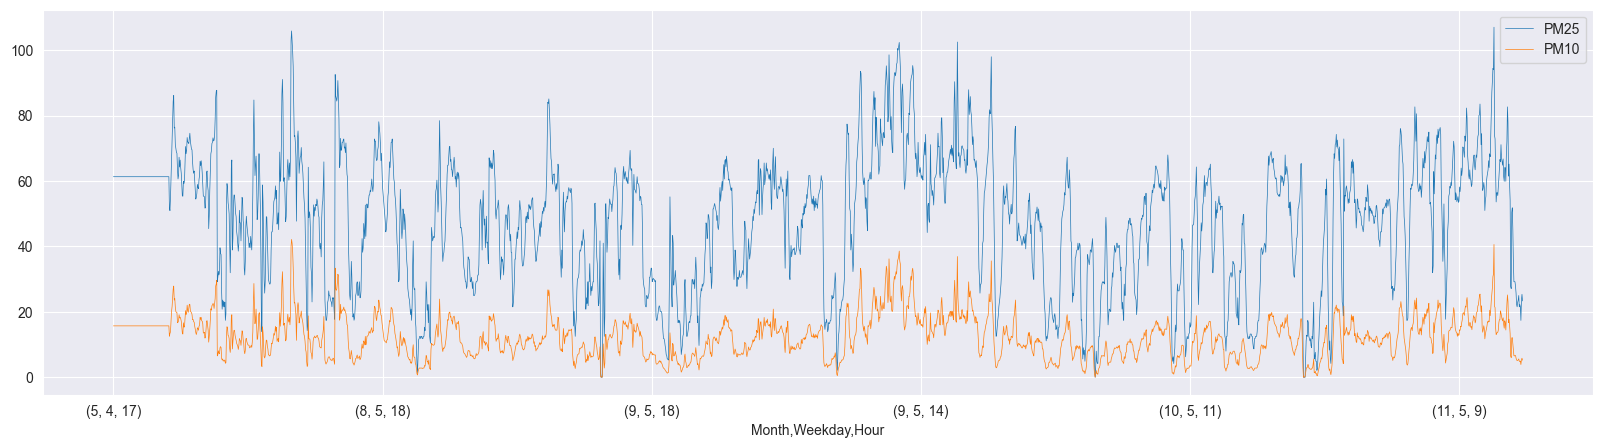

In [4]:
df[["PM25", "PM10"]].plot(linewidth=0.5, figsize=(20, 5))

In [5]:
PM25_cols = []
TEMP_cols = []
HUM_cols = []

for i in range(1, 25):
    col = 'PM25P' + str(i)
    PM25_cols.append(col)
    df[col] = df['PM25'].shift(periods=i)

    col = 'TEMPP' + str(i)
    TEMP_cols.append(col)
    df[col] = df['TEMP'].shift(periods=i)

    col = 'HUMP' + str(i)
    HUM_cols.append(col)
    df[col] = df['HUM'].shift(periods=i)

df["MAXPM25"] = df[PM25_cols].max(axis=1)
df["MINPM25"] = df[PM25_cols].min(axis=1)
df["AVGPM25"] = df[PM25_cols].mean(axis=1)

df["MAXTEMP"] = df[TEMP_cols].max(axis=1)
df["MINTEMP"] = df[TEMP_cols].min(axis=1)
df["AVGTEMP"] = df[TEMP_cols].mean(axis=1)

df["MAXHUM"] = df[HUM_cols].max(axis=1)
df["MINHUM"] = df[HUM_cols].min(axis=1)
df["AVGHUM"] = df[HUM_cols].mean(axis=1)

df = df.drop(TEMP_cols, axis=1)
df = df.drop(HUM_cols, axis=1)

df['Label'] = df['PM25'].shift(periods=-1)

df = df.dropna()

df.describe()

TEMP          HUM          CO2        LIGHT         PM25  \
count  2594.000000  2594.000000  2594.000000  2594.000000  2594.000000   
mean     28.377548    60.763771  1250.822012    26.303451    47.715046   
min      21.116667    36.016667   400.000000     0.000000     0.000000   
25%      27.650000    55.908333   543.916667     0.000000    32.316667   
50%      28.583333    60.933333   756.583333     2.500000    50.966667   
75%      29.400000    66.750000  1228.333333    20.000000    61.300000   
max      33.000000    77.150000  7992.000000   310.666667   107.000000   
std       1.861656     7.588742  1443.183361    55.074898    19.729225   

              PM10                           time       PM25P1       PM25P2  \
count  2594.000000                           2594  2594.000000  2594.000000   
mean     12.299320  2019-09-13 19:08:33.477255424    47.728905    47.743439   
min       0.000000            2019-06-01 17:25:00     0.000000     0.000000   
25%       7.416667            2019-08-18 13:40:00    32.466667    32.616667   
50%      11.941667            2019-09-21 02:55:00    50.966667    50.966667   
75%      15.900000            2019-10-18 04:10:00    61.300000    61.300000   
max      42.150000            2019-11-14 06:25:00   107.000000   107.000000   
std       6.358856                            NaN    19.726134    19.722238   

            PM25P3  ...      MAXPM25      MINPM25      AVGPM25      MAXTEMP  \
count  2594.000000  ...  2594.000000  2594.000000  2594.000000  2594.000000   
mean     47.760375  ...    66.143706    29.892246    47.885876    29.711362   
min       0.000000  ...    18.766667     0.000000     9.593750    23.283333   
25%      32.616667  ...    54.866667    15.983333    36.430556    28.783333   
50%      51.000000  ...    65.416667    29.183333    49.506944    29.716667   
75%      61.300000  ...    76.350000    44.783333    60.164062    31.058333   
max     107.000000  ...   107.000000    68.650000    89.049653    33.000000   
std      19.715004  ...    17.197014    18.075846    15.729897     1.758367   

           MINTEMP      AVGTEMP       MAXHUM       MINHUM       AVGHUM  \
count  2594.000000  2594.000000  2594.000000  2594.000000  2594.000000   
mean     26.883497    28.379018    67.730887    53.228476    60.774072   
min      21.116667    22.045833    49.783333    36.016667    42.256944   
25%      26.166667    27.714583    64.116667    49.633333    57.321528   
50%      27.000000    28.516910    68.900000    53.283333    61.453125   
75%      27.900000    29.382569    72.183333    57.083333    64.759028   
max      31.166667    31.858333    77.150000    71.166667    73.186111   
std       1.822482     1.651171     5.415830     6.558614     5.657250   

             Label  
count  2594.000000  
mean     47.700405  
min       0.000000  
25%      32.283333  
50%      50.966667  
75%      61.300000  
max     107.000000  
std      19.733231  

[8 rows x 41 columns]

In [7]:
columns = df.index.names
columns = np.append(columns, df.columns.values[:-1])
print(columns)
date_time_values = np.asmatrix([list(item) for item in df.index.values])
data = np.append(date_time_values, df.to_numpy(), axis=1)
data[:, 1] = np.where(data[:, 1] < 5, 0, 1)

bin_season = np.where(data[:, 0] <= 3, [0, 0], np.where(data[:, 0] <= 6, [0, 1], np.where(data[:, 0] <= 9, [1, 0], np.where(data[:, 0] <= 12, [1, 1], 0))))
data = np.delete(data, 0, 1)
data = np.append(bin_season, data, axis=1)

np.savetxt("../processed_data/HANOI_DATA.csv", df.to_numpy(), delimiter=",", fmt="%s")


['Month' 'Weekday' 'Hour' 'TEMP' 'HUM' 'CO2' 'LIGHT' 'PM25' 'PM10' 'time'
 'PM25P1' 'PM25P2' 'PM25P3' 'PM25P4' 'PM25P5' 'PM25P6' 'PM25P7' 'PM25P8'
 'PM25P9' 'PM25P10' 'PM25P11' 'PM25P12' 'PM25P13' 'PM25P14' 'PM25P15'
 'PM25P16' 'PM25P17' 'PM25P18' 'PM25P19' 'PM25P20' 'PM25P21' 'PM25P22'
 'PM25P23' 'PM25P24' 'MAXPM25' 'MINPM25' 'AVGPM25' 'MAXTEMP' 'MINTEMP'
 'AVGTEMP' 'MAXHUM' 'MINHUM' 'AVGHUM']
